In [2]:
import sys, os
from os.path import join, dirname, abspath
import matplotlib.pyplot as plt
from matplotlib.pyplot import Figure, Axes
import numpy as np
import networkx as nx
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from directions import *
from string import ascii_uppercase
plt.rcParams.update({
    "text.usetex": False,
    "ytick.minor.visible":True,
    "xtick.minor.visible":True,
    'xtick.direction': "in",
    'ytick.direction': "in"
})
outdir = "out"
os.makedirs(outdir,exist_ok=True)
def out(fname): return join(outdir,fname)
def savefig(plot_name): 
    plt.savefig(out(plot_name),bbox_inches="tight",dpi=250)
    
import pandas as pd
from numpy.linalg import matrix_power, eig

def arr_to_latex(M):
    return '$$\n' + r'\begin{bmatrix}' + '\n' + (r'\\' + '\n').join('&'.join(str(x) for x in row) for row in M) + '\n' + r'\end{bmatrix}' + '\n' +'$$'

def vec_to_latex(x,round=3):
    return '$$\n' + r'\begin{bmatrix}' + '\n' + (r' \\ ').join(str(np.round(v,round)) for v in x) + '\n' + r'\end{bmatrix}' + '\n' +'$$'

In [3]:
from car import Car
from tiles import Road, Exit, Onramp
from world import World

In [4]:
GRID_WIDTH = 5
GRID_HEIGHT = 6

In [5]:
road_tiles = []
for i in range(0,GRID_WIDTH):
    for j in range(0,GRID_HEIGHT):
        if not ((j == 2 or j == 3) and i == 2):
            road_tiles.append(Road(i,j,np.ones(9)/9))
len(road_tiles)

28

In [6]:
car = Car(road_tiles[0],desired_speed=1)

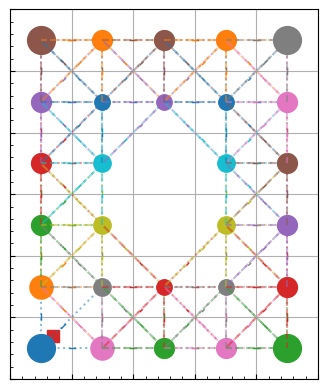

In [7]:
w = World(tiles=road_tiles,cars=[car])
w.draw()

car <car.Car object at 0x000002B00027E300>: I'm going to Road(1,0,occupied=False)!


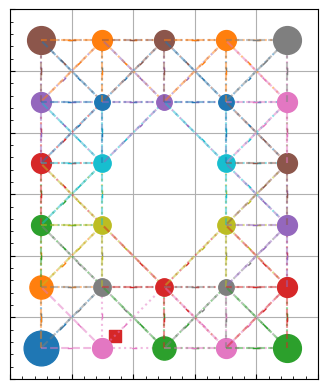

In [8]:
w.do_simulation_step()
w.draw()

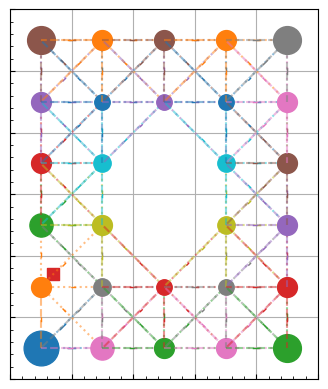

In [9]:
car.reset()
car.move_to(road_tiles[1])
w.draw()
car.reset()

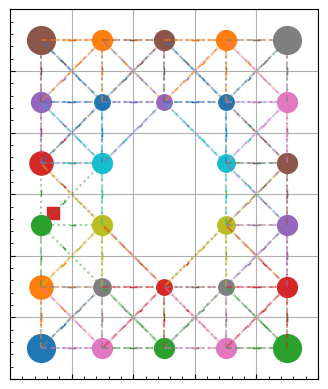

In [10]:
car.move_to(road_tiles[2])
w.draw()
car.reset()

In [11]:
road_tiles[0].p_directions

array([0.25, 0.25, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.25])

In [12]:
np.sum(road_tiles[0].p_directions)

np.float64(1.0)

In [13]:
NUM_FRAMES = 10

car <car.Car object at 0x000002B00027E300>: I'm going to Road(0,2,occupied=True)!


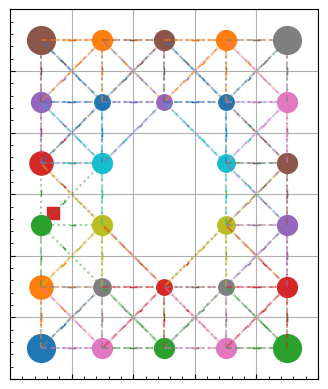

car <car.Car object at 0x000002B00027E300>: I'm going to Road(0,3,occupied=False)!
car <car.Car object at 0x000002B00027E300>: I'm going to Road(1,2,occupied=False)!
car <car.Car object at 0x000002B00027E300>: I'm going to Road(0,2,occupied=False)!
car <car.Car object at 0x000002B00027E300>: I'm going to Road(0,2,occupied=True)!
car <car.Car object at 0x000002B00027E300>: I'm going to Road(0,1,occupied=False)!
car <car.Car object at 0x000002B00027E300>: I'm going to Road(1,2,occupied=False)!
car <car.Car object at 0x000002B00027E300>: I'm going to Road(1,1,occupied=False)!
car <car.Car object at 0x000002B00027E300>: I'm going to Road(0,2,occupied=False)!
car <car.Car object at 0x000002B00027E300>: I'm going to Road(1,1,occupied=False)!
car <car.Car object at 0x000002B00027E300>: I'm going to Road(0,0,occupied=False)!


In [14]:
fig, ax = plt.subplots()

def update(frame):
    ax.cla()
    w.do_simulation_step()
    w.draw(ax=ax)

ani = animation.FuncAnimation(fig,update,frames=NUM_FRAMES,interval=500)
ani.save(filename=out("driving.gif"), writer="pillow",dpi=150)

In [15]:
straight_road = []
for i in range(10):
    straight_road.append(Road(0,i,[0.9,0,0,0,0,0,0,0,0.1]))

In [16]:
car1 = Car(straight_road[1],1)
car2 = Car(straight_road[0],2)

In [17]:
w = World(tiles=straight_road,cars=[car1,car2])

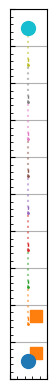

car <car.Car object at 0x000002B00093A420>: I'm going to Road(0,1,occupied=True)!
car <car.Car object at 0x000002B003F90320>: I'm going to Road(0,0,occupied=True)!
car <car.Car object at 0x000002B00093A420>: I'm going to Road(0,2,occupied=False)!
car <car.Car object at 0x000002B003F90320>: I'm going to Road(0,1,occupied=False)!
car <car.Car object at 0x000002B00093A420>: I'm going to Road(0,3,occupied=False)!
car <car.Car object at 0x000002B003F90320>: I'm going to Road(0,2,occupied=False)!
car <car.Car object at 0x000002B00093A420>: I'm going to Road(0,3,occupied=True)!
car <car.Car object at 0x000002B003F90320>: I'm going to Road(0,2,occupied=True)!
car <car.Car object at 0x000002B003F90320>: I'm going to Road(0,2,occupied=True)!
car <car.Car object at 0x000002B00093A420>: I'm going to Road(0,4,occupied=False)!
car <car.Car object at 0x000002B00093A420>: I'm going to Road(0,5,occupied=False)!
car <car.Car object at 0x000002B003F90320>: I'm going to Road(0,3,occupied=False)!
car <car.

In [18]:
w.run(steps=10,draw=True,outpath=out("driving_straight.gif"),markersize=10)

car <car.Car object at 0x000002B00093A420>: I'm going to Road(0,9,occupied=True)!
car <car.Car object at 0x000002B003F90320>: I'm going to Road(0,8,occupied=True)!


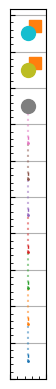

car <car.Car object at 0x000002B003F90320>: I'm going to Road(0,8,occupied=True)!
car <car.Car object at 0x000002B00093A420>: I'm going to Road(0,9,occupied=True)!
car <car.Car object at 0x000002B00093A420>: I'm going to Road(0,9,occupied=True)!
car <car.Car object at 0x000002B003F90320>: I'm going to Road(0,8,occupied=True)!
car <car.Car object at 0x000002B003F90320>: I'm going to Road(0,8,occupied=True)!
car <car.Car object at 0x000002B00093A420>: I'm going to Road(0,9,occupied=True)!
car <car.Car object at 0x000002B003F90320>: I'm going to Road(0,8,occupied=True)!
car <car.Car object at 0x000002B00093A420>: I'm going to Road(0,9,occupied=True)!
car <car.Car object at 0x000002B00093A420>: I'm going to Road(0,9,occupied=True)!
car <car.Car object at 0x000002B003F90320>: I'm going to Road(0,8,occupied=True)!
car <car.Car object at 0x000002B00093A420>: I'm going to Road(0,9,occupied=True)!
car <car.Car object at 0x000002B003F90320>: I'm going to Road(0,8,occupied=True)!
car <car.Car obj

In [19]:
fig, ax = plt.subplots()

def update(frame):
    ax.cla()
    w.do_simulation_step()
    w.draw(ax=ax,markersize=10)

ani = animation.FuncAnimation(fig,update,frames=NUM_FRAMES,interval=500)
ani.save(filename=out("driving_straight.gif"), writer="pillow",dpi=150)

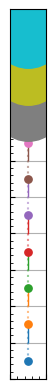

In [20]:
w.draw()

In [21]:
w.do_simulation_step()

car <car.Car object at 0x000002B003F90320>: I'm going to Road(0,8,occupied=True)!
car <car.Car object at 0x000002B00093A420>: I'm going to Road(0,9,occupied=True)!


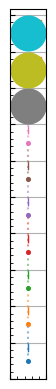

In [22]:
w.draw(markersize=25)

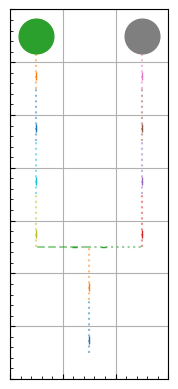

In [23]:
intersection_tiles = []

MAIN_X = 1

intersection_tiles.append(Road(MAIN_X,0,NORTH))
intersection_tiles.append(Road(MAIN_X,1,NORTH))
intersection_tiles.append(Road(MAIN_X,2,(NORTH+EAST+WEST)/3))

intersection_tiles.append(Road(MAIN_X+1,2,NORTH))
intersection_tiles.append(Road(MAIN_X+1,3,NORTH))
intersection_tiles.append(Road(MAIN_X+1,4,NORTH))
intersection_tiles.append(Road(MAIN_X+1,5,NORTH))
intersection_tiles.append(Road(MAIN_X+1,6,NORTH))

intersection_tiles.append(Road(MAIN_X-1,2,NORTH))
intersection_tiles.append(Road(MAIN_X-1,3,NORTH))
intersection_tiles.append(Road(MAIN_X-1,4,NORTH))
intersection_tiles.append(Road(MAIN_X-1,5,NORTH))
intersection_tiles.append(Road(MAIN_X-1,6,NORTH))



intersection = World(tiles=intersection_tiles,cars=[])
intersection.draw(markersize=25)

In [24]:
car = Car(tile=intersection_tiles[0],desired_speed=1)
intersection.add_car(car)

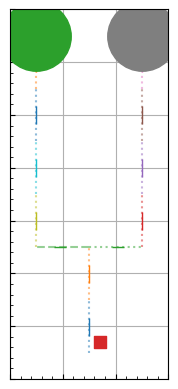

In [25]:
intersection.draw()

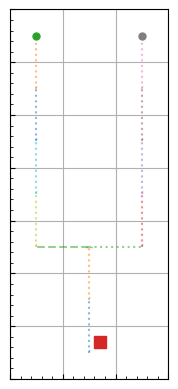

car <car.Car object at 0x000002B003E9C560>: I'm going to Road(1,1,occupied=False)!
car <car.Car object at 0x000002B003E9C560>: I'm going to Road(1,2,occupied=False)!
car <car.Car object at 0x000002B003E9C560>: I'm going to Road(2,2,occupied=False)!
car <car.Car object at 0x000002B003E9C560>: I'm going to Road(2,3,occupied=False)!
car <car.Car object at 0x000002B003E9C560>: I'm going to Road(2,4,occupied=False)!
car <car.Car object at 0x000002B003E9C560>: I'm going to Road(2,5,occupied=False)!
car <car.Car object at 0x000002B003E9C560>: I'm going to Road(2,6,occupied=False)!
car <car.Car object at 0x000002B003E9C560>: I'm going to Road(2,6,occupied=True)!
car <car.Car object at 0x000002B003E9C560>: I'm going to Road(2,6,occupied=True)!
car <car.Car object at 0x000002B003E9C560>: I'm going to Road(2,6,occupied=True)!
car <car.Car object at 0x000002B003E9C560>: I'm going to Road(2,6,occupied=True)!


In [26]:
intersection.run(10,True,out("intersection.gif"),markersize=5)

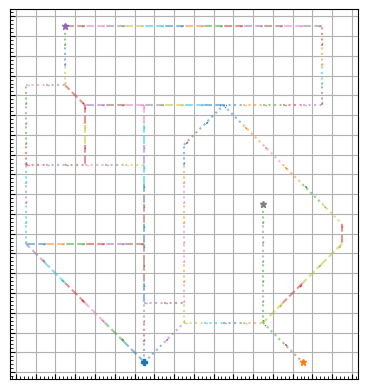

In [27]:
s = []
onramp = Onramp(6,0,(NW+N+NE)/3)
s.append(onramp)
s.append(Exit(14,0))
s.append(Road(5,1,NW))
s.append(Road(6,1,N))
s.append(Road(7,1,NE))
s.append(Road(13,1,SE))
s.append(Road(4,2,NW))
s.append(Road(6,2,N))
s.append(Road(8,2,(N+E)/2))
s.append(Road(9,2,E))
s.append(Road(10,2,E))
s.append(Road(11,2,E))
s.append(Road(12,2,(N+SE)/2))
s.append(Road(3,3,NW))
s.append(Road(6,3,E))
s.append(Road(7,3,E))
s.append(Road(8,3,N))
s.append(Road(12,3,N))
s.append(Road(13,3,SW))
s.append(Road(2,4,NW))
s.append(Road(6,4,S))
s.append(Road(8,4,N))
s.append(Road(12,4,N))
s.append(Road(14,4,SW))
s.append(Road(1,5,NW))
s.append(Road(6,5,S))
s.append(Road(8,5,N))
s.append(Road(12,5,N))
s.append(Road(15,5,SW))
s.append(Road(0,6,N))
s.append(Road(1,6,W))
s.append(Road(2,6,W))
s.append(Road(3,6,W))
s.append(Road(4,6,W))
s.append(Road(5,6,W))
s.append(Road(6,6,(W+S)/2))
s.append(Road(8,6,N))
s.append(Road(12,6,N))
s.append(Road(16,6,SW))
s.append(Road(0,7,N))
s.append(Road(6,7,S))
s.append(Road(8,7,N))
s.append(Road(12,7,N))
s.append(Road(16,7,S))
s.append(Road(0,8,N))
s.append(Road(6,8,S))
s.append(Road(8,8,N))
s.append(Exit(12,8))
s.append(Road(15,8,SE))
s.append(Road(0,9,N))
s.append(Road(6,9,S))
s.append(Road(8,9,N))
s.append(Road(14,9,SE))
s.append(Road(0,10,(N+E)/2))
s.append(Road(1,10,E))
s.append(Road(2,10,E))
s.append(Road(3,10,E))
s.append(Road(4,10,E))
s.append(Road(5,10,E))
s.append(Road(6,10,S))
s.append(Road(8,10,N))
s.append(Road(13,10,SE))
s.append(Road(0,11,N))
s.append(Road(3,11,S))
s.append(Road(6,11,S))
s.append(Road(8,11,NE))
s.append(Road(12,11,SE))
s.append(Road(0,12,N))
s.append(Road(3,12,S))
s.append(Road(6,12,S))
s.append(Road(9,12,NE))
s.append(Road(11,12,SE))
s.append(Road(0,13,N))
s.append(Road(3,13,(S+NW)/2))
s.append(Road(4,13,W))
s.append(Road(5,13,W))
s.append(Road(6,13,(S+W)/2))
s.append(Road(7,13,W))
s.append(Road(8,13,W))
s.append(Road(9,13,W))
s.append(Road(10,13,(W+E+SE)/3))
s.append(Road(11,13,E))
s.append(Road(12,13,E))
s.append(Road(13,13,E))
s.append(Road(14,13,E))
s.append(Road(15,13,N))
s.append(Road(0,14,E))
s.append(Road(1,14,E))
s.append(Road(2,14,N))
s.append(Road(15,14,N))
s.append(Road(2,15,N))
s.append(Road(15,15,N))
s.append(Road(2,16,N))
s.append(Road(15,16,N))
s.append(Exit(2,17))
s.append(Road(3,17,W))
s.append(Road(4,17,W))
s.append(Road(5,17,W))
s.append(Road(6,17,W))
s.append(Road(7,17,W))
s.append(Road(8,17,W))
s.append(Road(9,17,W))
s.append(Road(10,17,W))
s.append(Road(11,17,W))
s.append(Road(12,17,W))
s.append(Road(13,17,W))
s.append(Road(14,17,W))
s.append(Road(15,17,W))
# s.append(Onramp(10,1,N))


w = World(tiles=s, cars=[])
w.draw(markersize=5)


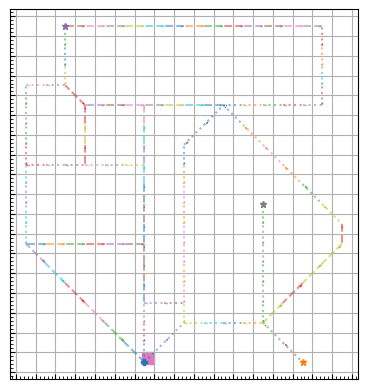

car <car.Car object at 0x000002B000A9FF20>: I'm going to Road(5,1,occupied=False)!
car <car.Car object at 0x000002B0041B8E90>: I'm going to Road(6,1,occupied=False)!
car <car.Car object at 0x000002B000A9FF20>: I'm going to Road(4,2,occupied=False)!
car <car.Car object at 0x000002B0041B8E90>: I'm going to Road(6,2,occupied=False)!
car <car.Car object at 0x000002B000A9FF20>: I'm going to Road(3,3,occupied=False)!
car <car.Car object at 0x000002B002B451F0>: I'm going to Road(7,1,occupied=False)!
car <car.Car object at 0x000002B00438ED20>: I'm going to Road(6,1,occupied=False)!
car <car.Car object at 0x000002B002B451F0>: I'm going to Road(8,2,occupied=False)!
car <car.Car object at 0x000002B000A9FF20>: I'm going to Road(2,4,occupied=False)!
car <car.Car object at 0x000002B0041B8E90>: I'm going to Road(6,3,occupied=False)!
car <car.Car object at 0x000002B00438ED20>: I'm going to Road(6,2,occupied=False)!
car <car.Car object at 0x000002B0041B8E90>: I'm going to Road(7,3,occupied=False)!
car 

In [28]:
c=Car(s[0],desired_speed=5)
w.add_car(c)
w.run(100,draw=True,outpath=out("highway.gif"),markersize=5)

In [29]:
w.markov.shape

(108, 108)

In [30]:
w.car_info_packets

[array([[0, 5, 1]]),
 array([[1, 6, 1],
        [0, 4, 2]]),
 array([[1, 6, 2],
        [0, 3, 3],
        [2, 7, 1]]),
 array([[3, 6, 1],
        [2, 8, 2],
        [0, 2, 4],
        [1, 6, 3]]),
 array([[3, 6, 2],
        [1, 7, 3],
        [2, 9, 2],
        [4, 5, 1],
        [0, 1, 5]]),
 array([[ 4,  4,  2],
        [ 0,  0,  6],
        [ 5,  6,  1],
        [ 3,  6,  3],
        [ 2, 10,  2],
        [ 1,  8,  3]]),
 array([[ 2, 11,  2],
        [ 5,  6,  2],
        [ 0,  0,  7],
        [ 3,  7,  3],
        [ 6,  5,  1],
        [ 4,  3,  3],
        [ 1,  8,  4]]),
 array([[ 4,  2,  4],
        [ 2, 12,  2],
        [ 0,  0,  8],
        [ 7,  7,  1],
        [ 5,  6,  3],
        [ 6,  4,  2],
        [ 1,  8,  5],
        [ 3,  8,  3]]),
 array([[ 6,  3,  3],
        [ 4,  1,  5],
        [ 7,  8,  2],
        [ 5,  7,  3],
        [ 0,  0,  9],
        [ 1,  8,  6],
        [ 2, 13,  1],
        [ 8,  6,  1],
        [ 3,  8,  4]]),
 array([[ 8,  6,  2],
        [ 1,  8

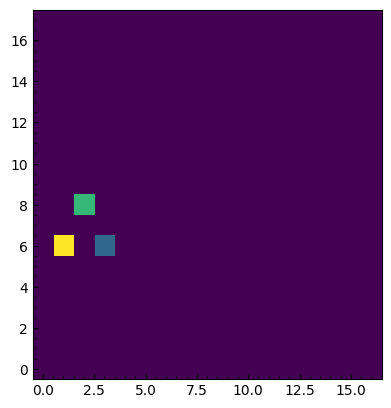

In [31]:
car_loc = w.car_info_packets[3]
car_map = np.zeros((w.max_y+1,w.max_x+1))
car_map[car_loc[:,1],car_loc[:,2]] = car_loc[:,0]
plt.imshow(car_map,origin="lower")

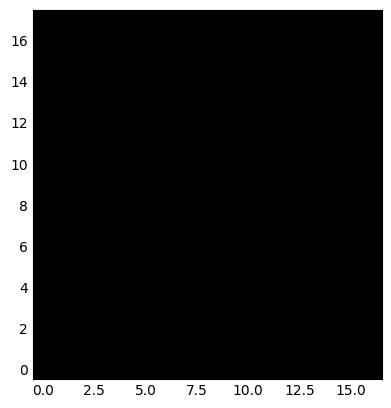

In [32]:
fig, ax = plt.subplots()
cumulative = np.zeros((w.max_y+1,w.max_x+1))

c = np.zeros(len(w._tiles))
c[onramp.index] = 1
mkov_locs = [np.array(c, copy=True)]

def update(frame):
    global cumulative, mkov_locs
    ax.cla()
    car_loc = w.car_info_packets[frame]
    car_map = np.zeros((w.max_y+1,w.max_x+1))
    car_locs = np.zeros((w.max_y+1,w.max_x+1))
    car_map[car_loc[:,2],car_loc[:,1]] = car_loc[:,0]
    car_locs[car_loc[:,2],car_loc[:,1]] = 1 
    cumulative += car_locs
    mkov_locs.append(w.markov.T@mkov_locs[-1])
    ax.imshow(car_map,origin="lower",cmap="inferno")
ani = animation.FuncAnimation(fig,update,frames=len(w.car_info_packets),interval=100)
ani.save(filename="car_heatmap.gif", writer="pillow",dpi=150)

In [33]:
for i,t in enumerate(w._tiles):
    if isinstance(t,Exit):
        cumulative[t.y,t.x] = 0

cumulative /= np.nansum(cumulative)

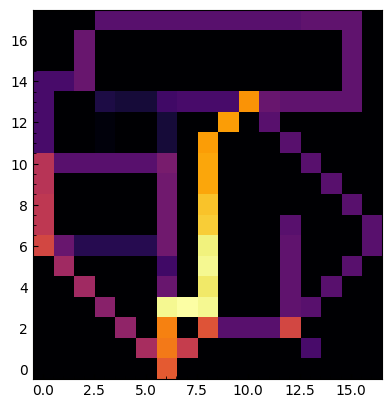

In [34]:
plt.imshow(cumulative,origin="lower",cmap="inferno")

In [35]:
mkov_locs = np.array(mkov_locs)
cumulative_mkov_car_locs = np.sum(np.array(mkov_locs),axis=0)
cumulative_mkov = np.zeros((w.max_y+1,w.max_x+1))
for i,t in enumerate(w._tiles):
    cumulative_mkov[t.y,t.x] = cumulative_mkov_car_locs[i]
    if isinstance(t,Exit):
        cumulative_mkov[t.y,t.x] = 0
cumulative_mkov /= np.sum(cumulative_mkov)

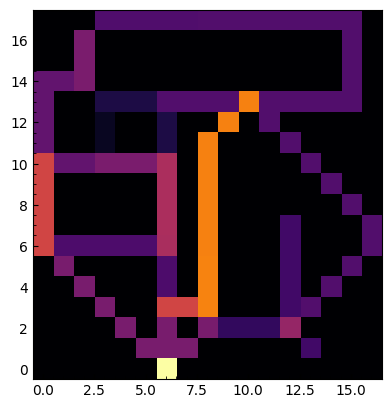

In [36]:
plt.imshow(cumulative_mkov,origin="lower",cmap="inferno")

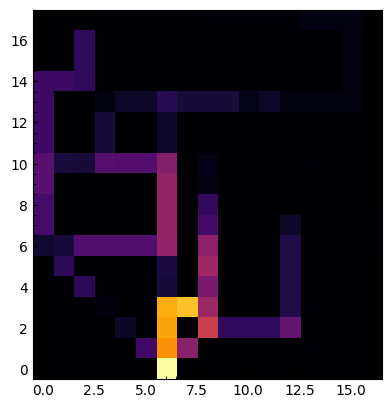

In [37]:
diff = cumulative - cumulative_mkov
plt.imshow(np.abs(diff),origin="lower",cmap="inferno")

In [38]:
car_loc[:,[1,2]]

array([[6, 1],
       [8, 2],
       [2, 4],
       [6, 3]])

In [39]:
car_loc[:,1]

array([6, 8, 2, 6])